### Project Title : To predict whether insurance will be claimed or not, using ML classification models

### Business Goal:

To predict whether the insurance will be claimed by the policy holder or not. It will be used by the management to understand how exactly the insurance claim vary with the independent variables. They can accordingly make changes in their insurance policy and modify their current business strategy. Further, the model will be a good way for management to decide their policy for existing and new customers.

### Step 1 : Read and Understand the data

In [1]:
# Importing all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. tree import DecisionTreeClassifier

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
# This dataset has a categorical label "insuranceclaim", has the policy holder made any claims or not.
# Using features like age, sex, bmi,children, smoker,etc., we will try to predict the class of the label

In [4]:
# Load the insurance dataset and read first five rows of the data
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
#Read the bottom five rows of the data
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [6]:
# Observations:
# Headers are in place
# No junk rows observed in the end
# Non standard missing values present in normalized-losses column

In [7]:
# Check the dimesions of the data
df.shape

(1338, 8)

In [8]:
# Ratio of columns to rows is very healthy
# This can influence our approach to handling outliers and missing values

In [9]:
# Check the information(non-null count, dtypes) of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [10]:
# Check the data types of all the features and label
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [11]:
# There are some columns which looks like category columns but currently appearing as numeric columns.
# sex, smoker, region and insuranceclaim
# Even though we will encode them as numbers, we should separate them.
# So, they do not get rescaled along with other numeric columns.

In [12]:
# Change data types of numerical columns which are actually categorical
df['sex'] = df['sex'].astype('object')
df['smoker'] = df['smoker'].astype('object')
df['region'] = df['region'].astype('object')
df['insuranceclaim'] = df['insuranceclaim'].astype('object')

In [13]:
#Check data types of features again
df.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
insuranceclaim     object
dtype: object

### Step 2: Data cleaning and dealing with outliers

In [14]:
# Check whether there any missing or null values in the data
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [15]:
# There are no non standard missing values or junk characters

In [16]:
# Check the descriptive statistics of numeric columns
df.select_dtypes(include="number").head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [17]:
df_num = df.select_dtypes(include="number")

In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [19]:
df_num.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
# The columns have varied range of values. makes a case for rescaling.
# Q1-Q2-Q3 appear spread out e.g. charges
# children is clearly not a column for standard scaling

In [21]:
# Remove rows which have outlier values in any of the numeric columns
# IQR (Inter Quantile Range) method.

In [22]:
# Two ways of removing outliers using numeric columns

# method 1:
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1

# ~ represents NOT or Exclude such rows
df[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [23]:
# Method 2:
# Remove rows in entire df using each column

for i in df_num.columns:
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df_num[i] < Q1 - 1.5 * IQR) | (df_num[i] > Q3 + 1.5 * IQR))]

In [24]:
# The Tilde ~ sign reverses the bool value

In [25]:
df.shape

(1193, 8)

In [26]:
# Check the descriptive statistics of catagorical columns
df_cat = df.select_dtypes(include="object")

In [27]:
df_cat.describe()

,sex,smoker,region,insuranceclaim
count,1193,1193,1193,1193
unique,2,2,4,2
top,0,0,1,1
freq,611,1055,305,641


In [28]:
#'sex' has nearly equal values for male and female
# Most rows are non smokers
#'insuranceclaim' has nearly equal 'claim' and 'no claim'

### Step 3 : Univariate Analysis

In [29]:
# NUMERICAL COLUMNS
df_num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [30]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis) =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

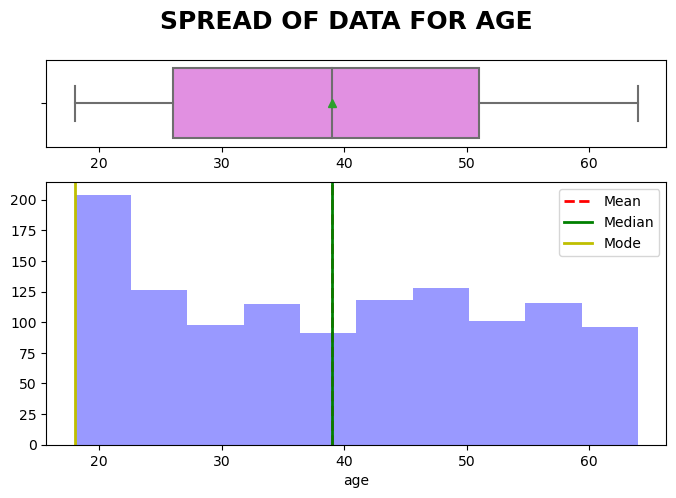

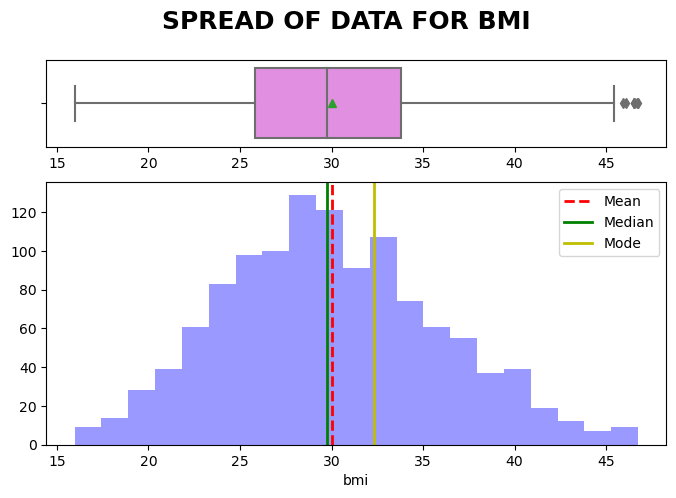

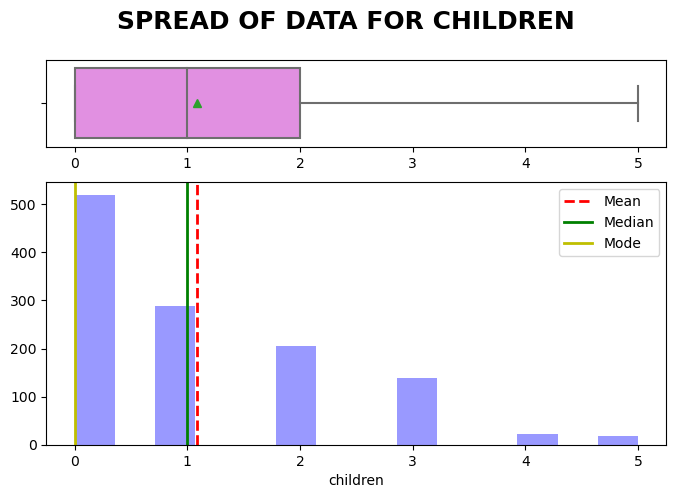

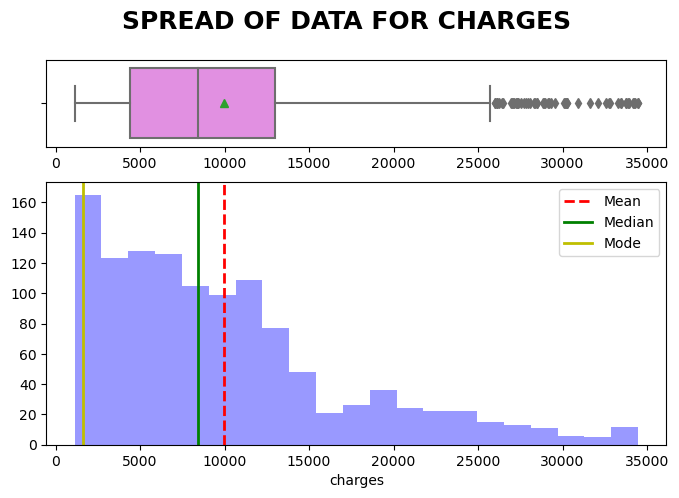

In [31]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

Observations

- Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
- Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
- Most of the beneficary have no childrens.
- Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

In [32]:
# CATEGORICAL COLUMNS
df_cat.columns

Index(['sex', 'smoker', 'region', 'insuranceclaim'], dtype='object')

In [33]:
# How many rows present for each value in a category column

0    611
1    582
Name: sex, dtype: int64

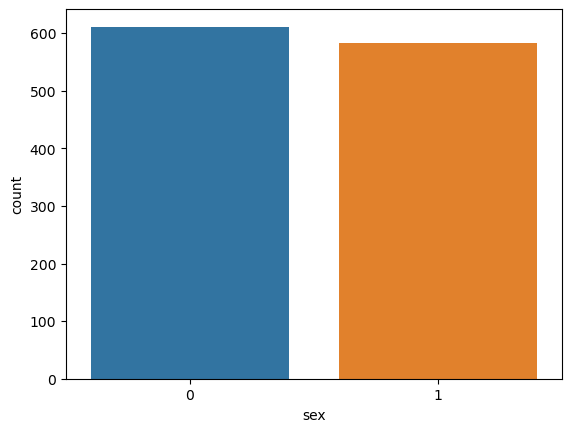

In [34]:
# 'sex' - Countplot()
sns.countplot(df['sex'])
df['sex'].value_counts()

0    1055
1     138
Name: smoker, dtype: int64

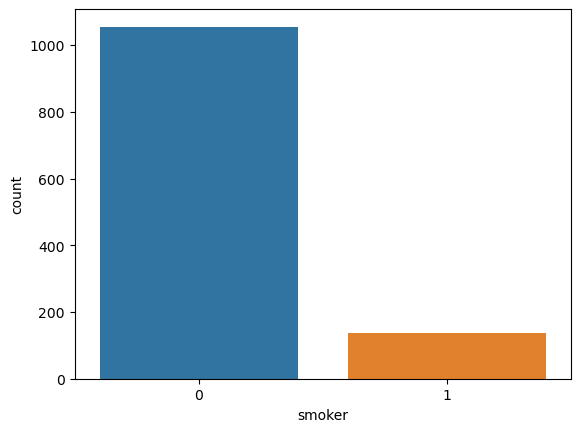

In [78]:
# 'smoker' - Countplot()
sns.countplot(df['smoker'])
df['smoker'].value_counts()

1    305
2    302
0    295
3    291
Name: region, dtype: int64

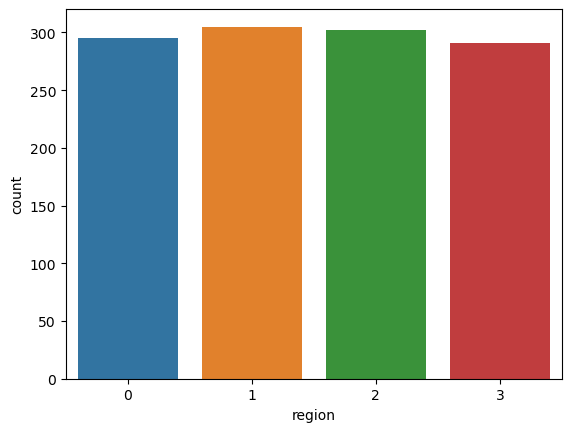

In [79]:
#'region' - Countplot()
sns.countplot(df['region'])
df['region'].value_counts()

1    641
0    552
Name: insuranceclaim, dtype: int64

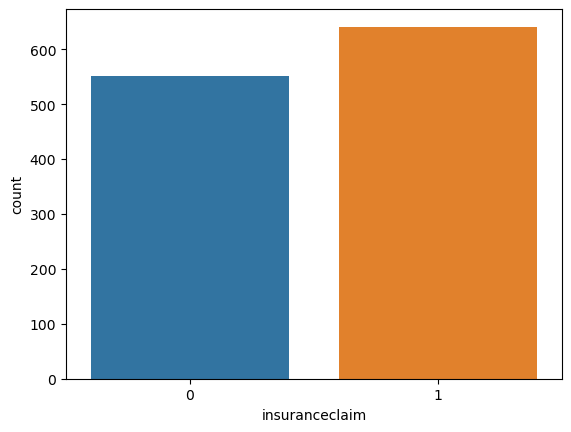

In [80]:
# 'insuranceclaim' - Countplot()
sns.countplot(df['insuranceclaim'])
df['insuranceclaim'].value_counts()

Observations

- 611 male and 582 female, indicated sample has slightly more males than females.
- 1038 nonsomker and 138 smoker, indicating sample has more nonsmokers.
- Number of claims from customer who reside in southwest region is more compared to other regions.

### Step 4 :Bivariate Analysis

<AxesSubplot:xlabel='region'>

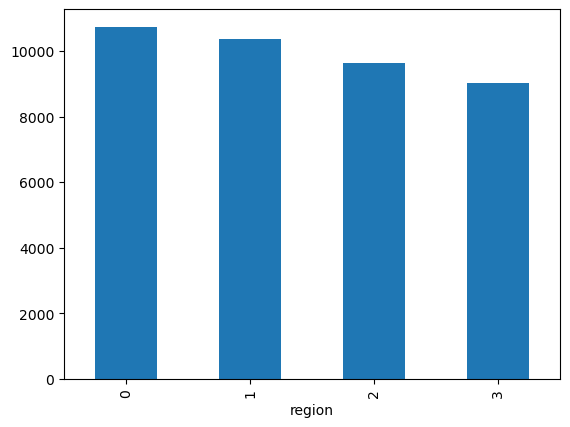

In [38]:
# Mean of price for each region
df.groupby('region').mean()['charges'].plot(kind='bar')

<AxesSubplot:xlabel='region', ylabel='charges'>

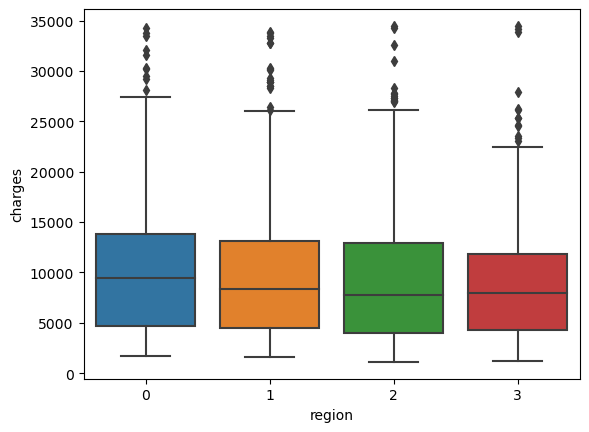

In [39]:
# consider categorical data and numeric to check if distributions are different.
sns.boxplot(x = df['region'],y = df['charges'])

<AxesSubplot:xlabel='smoker'>

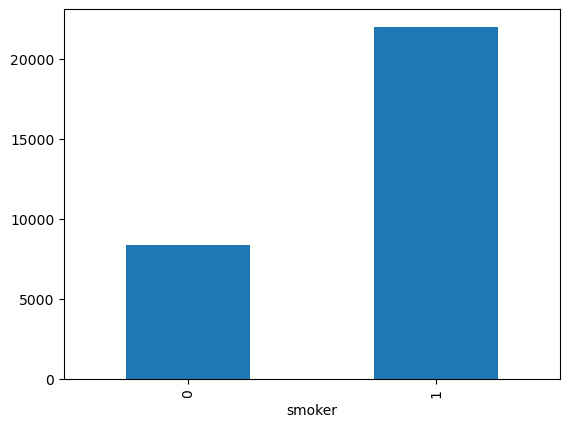

In [40]:
# Mean price for smokers and non-smokers
df.groupby('smoker').mean()['charges'].plot(kind='bar')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

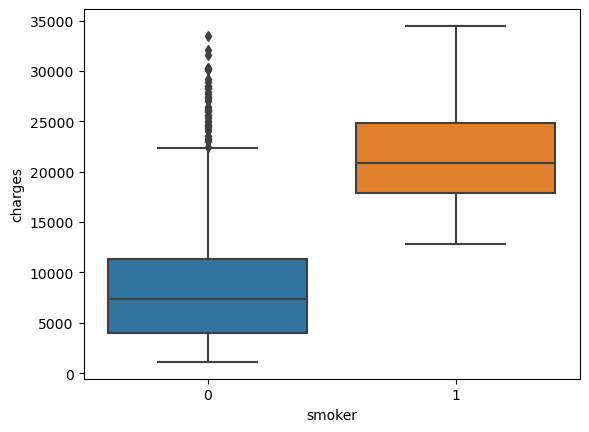

In [41]:
# consider categorical data and numeric to check if distributions are different. we can see that in smoker and charges.
sns.boxplot(x = df['smoker'],y = df['charges'])

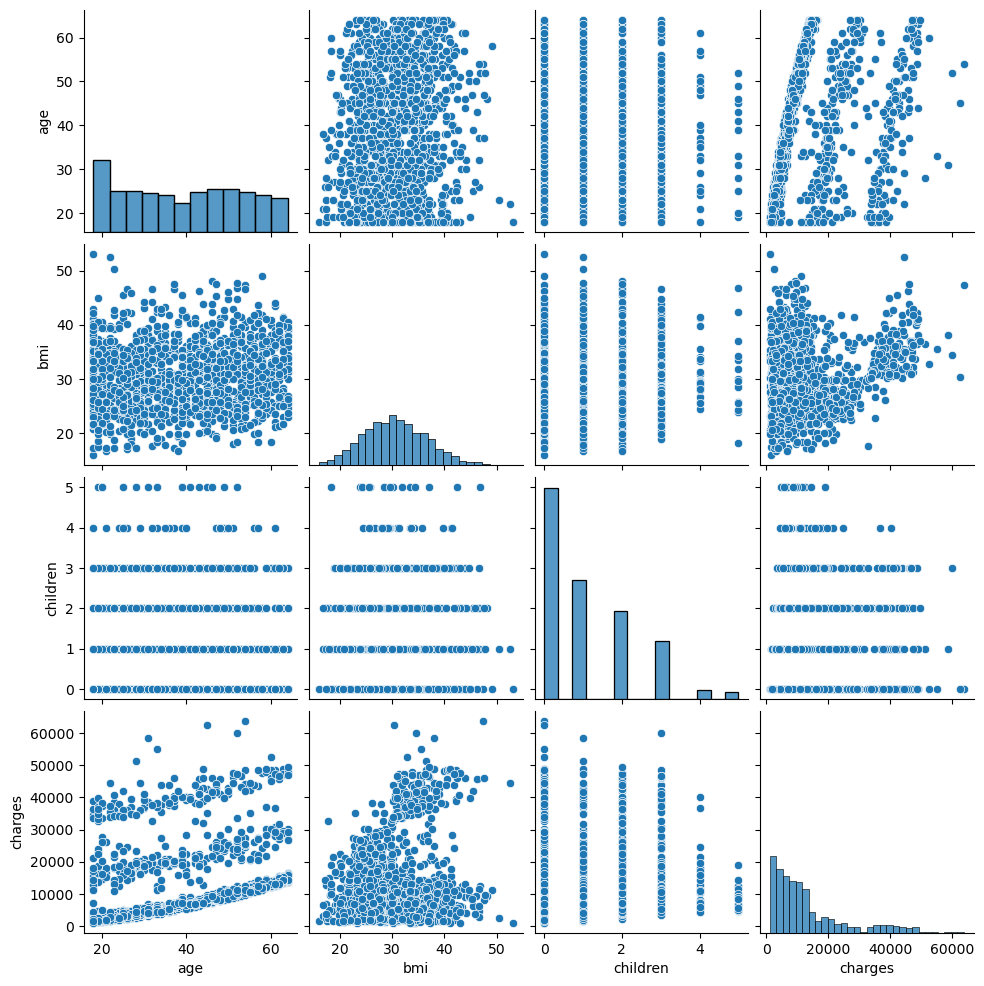

In [42]:
# Pairplots to study relationships
sns.pairplot(df_num)

### Step 5 : Data Preprocessing - Encoding and Feature Scaling

In [43]:
# This has the label column, drop from features dataset
X = df.drop(['insuranceclaim'],axis=1)
y = df['insuranceclaim']

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [45]:
X_scaled.columns = X.columns
X_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.387788,0.0,1.0,1.000000,0.472641
1,0.000000,1.0,0.578435,0.2,0.0,0.666667,0.018101
2,0.217391,1.0,0.553426,0.6,0.0,0.666667,0.099775
3,0.326087,1.0,0.219065,0.0,0.0,0.333333,0.625547
4,0.304348,1.0,0.419617,0.0,0.0,0.333333,0.082306


In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Step 6 : Splitting the data

In [47]:
# Separate the dataset into features and label
# Split into train and test

In [48]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (835, 7)
y_train (835,)
X_test (358, 7)
y_test (358,)


In [49]:
# Now fit the model on train
# Evaluate various performance metrics of ML classification models

### Step 7 : Fitting various classification models and evaluating their performance metrics

### 1. KNN Classifier Model

In [50]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn_clf.predict(X_test)

In [52]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix of the KNN Classifier model:\n', cm)

confusion matrix of the KNN Classifier model:
 [[147  38]
 [ 26 147]]


In [53]:
# Accuracy Score                                    
ac = accuracy_score(y_test, y_pred)                    
print('Accuracy of the KNN Classifier model:\n', ac)

Accuracy of the KNN Classifier model:
 0.8212290502793296


In [54]:
# Recall Score                                      
recall = recall_score(y_test, y_pred)                
print('Recall of the KNN Classifier model:\n', recall)

Recall of the KNN Classifier model:
 0.8497109826589595


In [55]:
# Precision score                                            
precision = precision_score(y_test, y_pred)                  
print('Precision of the KNN Classifier model:\n', precision)

Precision of the KNN Classifier model:
 0.7945945945945946


In [56]:
# F1 Score                                                     
f1_score_value = f1_score(y_test, y_pred)                      
print('F1 score of the KNN Classifier model:', f1_score_value)

F1 score of the KNN Classifier model: 0.8212290502793296


### 2. Logistic Regression Model

In [57]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = log_clf.predict(X_test)

In [59]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n', cm)

confusion matrix:
 [[144  41]
 [ 21 152]]


In [60]:
# Accuracy Score                                        
ac = accuracy_score(y_test, y_pred)                        
print('Accuracy of the Logistic Regression model:\n', ac)

Accuracy of the Logistic Regression model:
 0.8268156424581006


In [61]:
# Recall Score                                            
recall = recall_score(y_test, y_pred)                      
print('Recall of the Logistic Regression model:\n', recall)

Recall of the Logistic Regression model:
 0.8786127167630058


In [62]:
# Precision score                                               
precision = precision_score(y_test, y_pred)                        
print('Precision of the Logistic Regression model:\n', precision)

Precision of the Logistic Regression model:
 0.7875647668393783


In [63]:
# F1 Score                                                             
f1_score_value = f1_score(y_test, y_pred)
print('F1 score of the Logistic Regression model:', f1_score_value)

F1 score of the Logistic Regression model: 0.8306010928961748


### 3. Decision Tree Classifier Model

In [64]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = dt_clf.predict(X_test)

In [66]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n', cm)

confusion matrix:
 [[181   4]
 [  6 167]]


In [67]:
# Accuracy Score
ac = accuracy_score(y_test, y_pred)
print('Accuracy of the Decision Tree Classifier model:\n', ac)

Accuracy of the Decision Tree Classifier model:
 0.9720670391061452


In [68]:
# Recall Score
recall = recall_score(y_test, y_pred)
print('Recall of the Decision Tree Classifier model:\n', recall)

Recall of the Decision Tree Classifier model:
 0.9653179190751445


In [69]:
# Precision score
precision = precision_score(y_test, y_pred)
print('Precision of the Decision Tree Classifier model:\n', precision)

Precision of the Decision Tree Classifier model:
 0.9766081871345029


In [70]:
# F1 Score
f1_score_value = f1_score(y_test, y_pred)
print('F1 score of the Decision Tree Classifier model:', f1_score_value)

F1 score of the Decision Tree Classifier model: 0.9709302325581396


### Comparing the model performance

In [71]:
# Initialize an empty DataFrame
models_report = pd.DataFrame()

clfs = {
    'KNN Classifier Model': KNeighborsClassifier(),
    'Logistic Regression Model': LogisticRegression(),
    'Decision Tree Classifier Model': DecisionTreeClassifier(),
}

for clf_name, clf in clfs.items():
    # Train the classifier and obtain the predictions
    # Assuming you have already defined X_train, y_train, X_test, and y_test

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1_score_value = f1_score(y_test, y_pred)

    # Create a series with the performance metrics
    t = pd.Series({
        'Model Name': clf_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 score': f1_score_value
    })

    # Append the series to the models_report DataFrame
    models_report = models_report.append(t, ignore_index=True)

# Sort the DataFrame by the 'f1 score' column in descending order
models_report = models_report.sort_values(by='F1 score', ascending=False)
models_report

,Model Name,Accuracy,Recall,Precision,F1 score
2,Decision Tree Classifier Model,0.972067,0.965318,0.976608,0.970930
1,Logistic Regression Model,0.826816,0.878613,0.787565,0.830601
0,KNN Classifier Model,0.821229,0.849711,0.794595,0.821229


### Step 8: Predict the insurance claim for new customers

In [72]:
# First customer
Data = {'age':35, 'sex':1, 'bmi': 55, 'children': 2, 'smoker':0, 'region':3, 'charges': 4560}
Data

{'age': 35,
 'sex': 1,
 'bmi': 55,
 'children': 2,
 'smoker': 0,
 'region': 3,
 'charges': 4560}

In [73]:
df_new = pd.DataFrame(Data, index=[0])
df_new

,age,sex,bmi,children,smoker,region,charges
0,35,1,55,2,0,3,4560


In [74]:
new_pred = dt_clf.predict(df_new)
new_pred

array([0])

In [75]:
# Second customer
Data = {'age':45, 'sex':0, 'bmi': 44, 'children': 1, 'smoker':1, 'region':2, 'charges': 4000}
Data

{'age': 45,
 'sex': 0,
 'bmi': 44,
 'children': 1,
 'smoker': 1,
 'region': 2,
 'charges': 4000}

In [76]:
df_new = pd.DataFrame(Data, index=[0])
df_new

,age,sex,bmi,children,smoker,region,charges
0,45,0,44,1,1,2,4000


In [77]:
new_pred = dt_clf.predict(df_new)
new_pred

array([1])